<a href="https://colab.research.google.com/github/Julia-Vanyarina/data-science/blob/main/%D0%92%D0%B0%D0%BD%D1%8F%D1%80%D0%B8%D0%BD%D0%B0_%D0%AE%D0%BB%D0%B8%D1%8F_HW3_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 3. Описательная статистика


## Ваши данные
Заполните следующую информацию:

*Имя:* Юлия
*Фамилия:* Ванярина
*Электронная почта:* VanyarinraYA368@mgpu.ru



In [1]:
# imports and setup
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Часть 3.1: Индекс качества воздуха SLC

В этой задаче изучить качество воздуха в Солт-Лейк-Сити.

### Задача 3.1.0. Узнайте об AQI

Прочтите об [индексе качества воздуха (AQI)](https://www.airnow.gov/aqi/aqi-basics) и
Система [AirNow](https://www.airnow.gov/about-airnow).


### Задача 3.1.1. Скачать данные
Агентство по охране окружающей среды предоставляет доступ к данным о качестве воздуха на веб-сайте AirData. Прочтите о данных, доступных на [этой информационной странице] (https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information). Или скачайте файл `ad_viz_plotval_data.csv` в каталоге задания.


Перейдите на [website] (https://www.epa.gov/outdoor-air-quality-data/download-daily-data) и загрузите следующие ежедневные данные:

+ Pollutant = PM2.5
+ Year = 2023
+ City = Salt Lake City, UT
+ Monitor Site = All Sites

### Задача 3.1.2. Импорт данных. Предобработка данных
Используйте функцию `pandas.read_csv()` для импорта данных.

Предупреждение: эти данные не соответствуют критериям качетсва:

+ Даты не сортируются.
+ Некоторые даты могут иметь пропущенные значения.
+ Некоторые даты могут иметь несколько значений, соответствующих разным датчикам (POC=1,2,3,4,5).

In [40]:
# Ваш код
from google.colab import files
uploated = files.upload()

Saving ad_viz_plotval_data.csv to ad_viz_plotval_data (1).csv


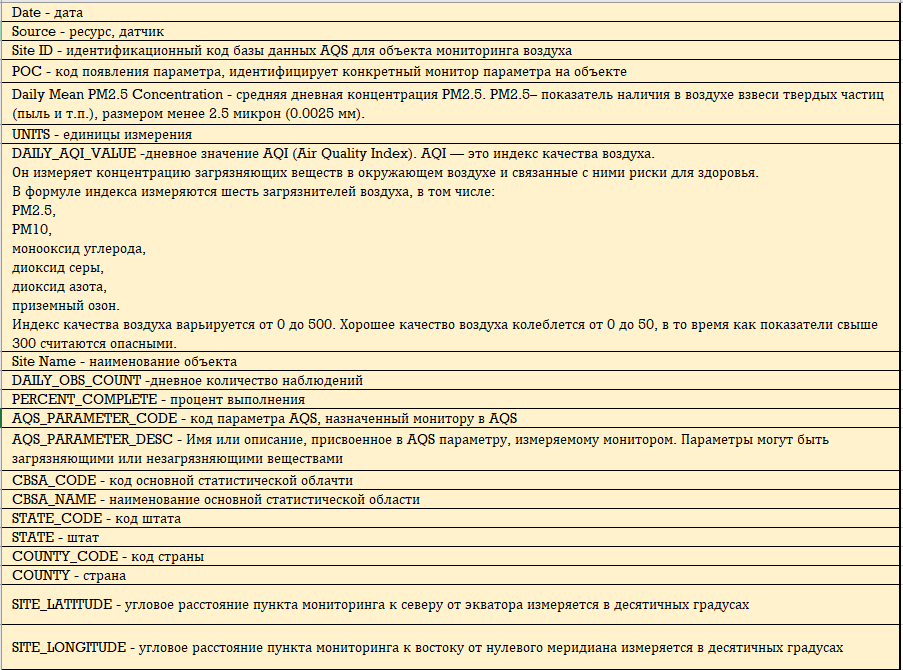

In [41]:
df=pd.read_csv('ad_viz_plotval_data.csv')
df.head(10)

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2023,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,01/02/2023,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,01/03/2023,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,01/04/2023,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,01/05/2023,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
5,01/06/2023,AQS,490352005,1,5.0,ug/m3 LC,21,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
6,01/07/2023,AQS,490352005,1,7.8,ug/m3 LC,33,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
7,01/08/2023,AQS,490352005,1,2.0,ug/m3 LC,8,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
8,01/09/2023,AQS,490352005,1,1.9,ug/m3 LC,8,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
9,01/10/2023,AQS,490352005,1,1.0,ug/m3 LC,4,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167


In [4]:
df.shape

(6514, 20)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            6514 non-null   object 
 1   Source                          6514 non-null   object 
 2   Site ID                         6514 non-null   int64  
 3   POC                             6514 non-null   int64  
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64
 5   UNITS                           6514 non-null   object 
 6   DAILY_AQI_VALUE                 6514 non-null   int64  
 7   Site Name                       6514 non-null   object 
 8   DAILY_OBS_COUNT                 6514 non-null   int64  
 9   PERCENT_COMPLETE                6514 non-null   float64
 10  AQS_PARAMETER_CODE              6514 non-null   int64  
 11  AQS_PARAMETER_DESC              6514 non-null   object 
 12  CBSA_CODE                       65

In [43]:
df['Date'] = pd.to_datetime(df['Date'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            6514 non-null   datetime64[ns]
 1   Source                          6514 non-null   object        
 2   Site ID                         6514 non-null   int64         
 3   POC                             6514 non-null   int64         
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64       
 5   UNITS                           6514 non-null   object        
 6   DAILY_AQI_VALUE                 6514 non-null   int64         
 7   Site Name                       6514 non-null   object        
 8   DAILY_OBS_COUNT                 6514 non-null   int64         
 9   PERCENT_COMPLETE                6514 non-null   float64       
 10  AQS_PARAMETER_CODE              6514 non-null   int64         
 11  AQS_

In [8]:
df.isna().sum()

Date                              0
Source                            0
Site ID                           0
POC                               0
Daily Mean PM2.5 Concentration    0
UNITS                             0
DAILY_AQI_VALUE                   0
Site Name                         0
DAILY_OBS_COUNT                   0
PERCENT_COMPLETE                  0
AQS_PARAMETER_CODE                0
AQS_PARAMETER_DESC                0
CBSA_CODE                         0
CBSA_NAME                         0
STATE_CODE                        0
STATE                             0
COUNTY_CODE                       0
COUNTY                            0
SITE_LATITUDE                     0
SITE_LONGITUDE                    0
dtype: int64

***SciPy и Pandas предлагают полезные процедуры для быстрого получения описательной статистики с помощью одного вызова функции или метода.***

In [9]:
df.describe()

,Date,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,6514,6.514000e+03,6514.000000,6514.000000,6514.000000,6514.0,6514.0,6514.0,6514.0,6514.0,6514.000000,6514.000000,6514.000000
mean,2023-07-02 03:03:28.903899392,4.903637e+08,2.171323,7.243921,28.064784,1.0,100.0,88101.0,41620.0,49.0,36.105312,40.685918,-111.987452
min,2023-01-01 00:00:00,4.903520e+08,1.000000,-0.500000,0.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.496392,-112.355780
25%,2023-04-02 00:00:00,4.903530e+08,1.000000,3.800000,16.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.600550,-112.036298
50%,2023-07-02 00:00:00,4.903530e+08,2.000000,5.700000,24.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.709762,-111.931000
75%,2023-10-01 00:00:00,4.903530e+08,3.000000,7.900000,33.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.777145,-111.894167
max,2023-12-31 00:00:00,4.904500e+08,5.000000,52.600000,143.000000,1.0,100.0,88101.0,41620.0,49.0,45.000000,40.807897,-111.872222
std,NaN,3.041880e+04,1.259437,6.279512,19.298589,0.0,0.0,0.0,0.0,0.0,3.135747,0.097821,0.143387


Статистика для двух важных столбцов.
*   Daily Mean PM2.5 Concentration -  средняя дневная концентрация наличия в воздухе взвеси твердых частиц (пыль и т.п.)
*   DAILY_AQI_VALUE - индекс качества воздуха

In [10]:
df['Daily Mean PM2.5 Concentration'].describe()

count    6514.000000
mean        7.243921
std         6.279512
min        -0.500000
25%         3.800000
50%         5.700000
75%         7.900000
max        52.600000
Name: Daily Mean PM2.5 Concentration, dtype: float64

**По данным ВОЗ среднесуточный уровень PM 2.5 в воздухе не должен превышать 25 мкг/м.куб. Максимальное значение PM 2.5 превышает это значение больше чем в 2 раза**

In [11]:
df['DAILY_AQI_VALUE'].describe()

count    6514.000000
mean       28.064784
std        19.298589
min         0.000000
25%        16.000000
50%        24.000000
75%        33.000000
max       143.000000
Name: DAILY_AQI_VALUE, dtype: float64

**Диапазон AQI: 0-50 - хорошее качество воздуха; 51-100 - удовлетворительное качество воздуха; 101-200 - воздух вызывает дискомфорт при дыхании. Показатели выше 201 указывают на плохое качество воздуха, что может повлечь за собой серьёзные последствия для здоровья.  По максимальному значению можем сделать вывод,что существуют регионы,где дыхание может быть затруднено**



---



**Коэффициент асимметрии в Python используется для измерения степени асимметрии распределения вероятности случайной величины. Коэффициент асимметрии может быть положительным, отрицательным или равным нулю, что соответствует симметричному распределению. Для нормального распределения коэффициент должен быть равен нулю.**

источник: https://habr.com/ru/articles/556042/

# Проверка на нормльность df['Daily Mean PM2.5 Concentration']

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Рассчитываем коэффициенты асимметрии и эксцесса
skewness = skew(df['Daily Mean PM2.5 Concentration'])
kurt = kurtosis(df['Daily Mean PM2.5 Concentration'])

# Печатаем результаты
print(f"Коэффициент асимметрии: {skewness}")
print(f"Коэффициент эксцесса: {kurt}")

# Проверяем условие нормальности данных на основе коэффициентов
if abs(skewness) < 0.5 and abs(kurt) < 0.5:
    print("Данные предположительно имеют нормальное распределение")
else:
    print("Данные не имеют нормальное распределение")

Коэффициент асимметрии: 2.747670137955149
Коэффициент эксцесса: 9.63653828956245
Данные не имеют нормальное распределение


In [13]:
def PM2():
    '''Получить коэффициент асимметрии нормального распределения'''
    s = df['Daily Mean PM2.5 Concentration']
    return {'среднее': s.mean(), 'медиана': s.median(), 'асимметрия': s.skew()}

# Вызов функции  и вывод результатов
result = PM2()
print("Результаты функции PM2:")
print("Среднее:", result['среднее'])
print("Медиана:", result['медиана'])
print("Коэффициент асимметрии:", result['асимметрия'])

Результаты функции PM2:
Среднее: 7.243920785999385
Медиана: 5.7
Коэффициент асимметрии: 2.7483030391339933


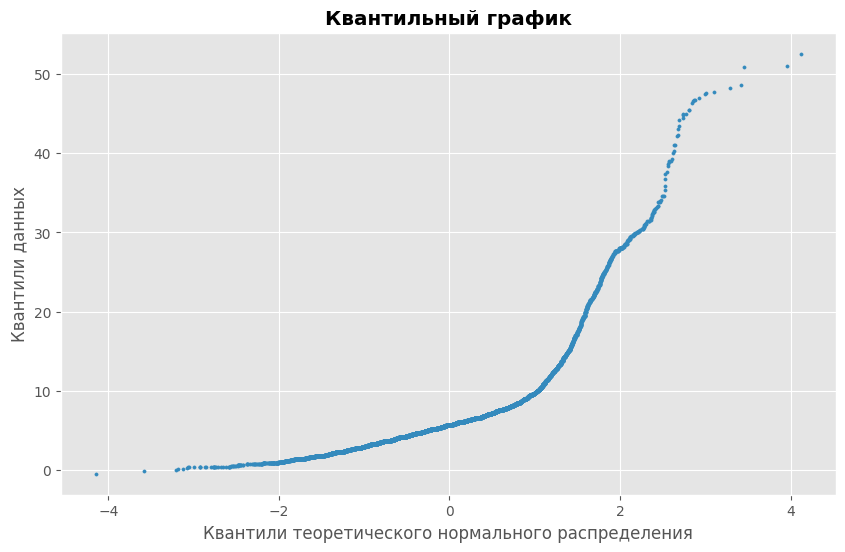

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

def qqplot(xs):
    '''Квантильный график (график квантиль-квантиль, Q-Q plot)'''
    d = {0: sorted(stats.norm.rvs(loc=0, scale=1, size=len(xs))),
         1: sorted(xs)}
    pd.DataFrame(d).plot.scatter(0, 1, s=5, grid=True)
    plt.xlabel('Квантили теоретического нормального распределения')
    plt.ylabel('Квантили данных')
    plt.title('Квантильный график', fontweight='semibold')

def PM2_5(df):
    '''Показать квантильные графики для честного и нечестного булочников'''
    qqplot(df['Daily Mean PM2.5 Concentration'])
    plt.show()

# Вызов эксперимента для датафрейма df
PM2_5(df)

***kdeplot это функция в библиотеке Seaborn, используемая для построения графика оценки плотности ядра (KDE) непрерывной переменной. KDE - это способ оценки функции плотности вероятности непрерывной случайной величины, и он может быть полезен для визуализации распределения точек данных.***



<ipython-input-15-9cb9ef77f88c>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_column, shade=True)  # Построение функции плотности вероятности


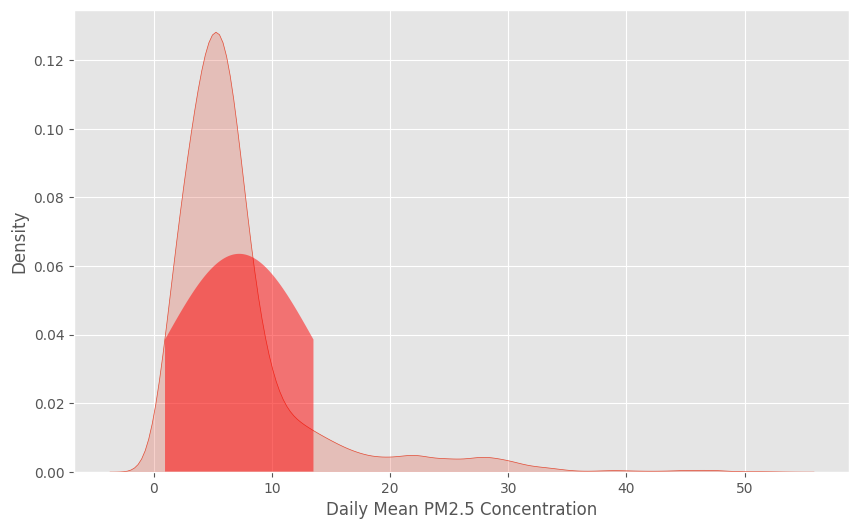

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

data_column = df['Daily Mean PM2.5 Concentration']

mu = data_column.mean()  # Вычисление среднего значения
sigma = data_column.std()  # Вычисление стандартного отклонения

sns.kdeplot(data_column, shade=True)  # Построение функции плотности вероятности
x2 = np.arange(mu - sigma, mu + sigma, 0.001)
plt.fill_between(x2, y1=norm.pdf(x2, loc=mu, scale=sigma), facecolor='red', alpha=0.5)
plt.show()

# Проверка на нормальность df['DAILY_AQI_VALUE']




In [16]:
# Рассчитываем коэффициенты асимметрии и эксцесса
skewness = skew(df['DAILY_AQI_VALUE'])
kurt = kurtosis(df['DAILY_AQI_VALUE'])

# Печатаем результаты
print(f"Коэффициент асимметрии: {skewness}")
print(f"Коэффициент эксцесса: {kurt}")

# Проверяем условие нормальности данных на основе коэффициентов
if abs(skewness) < 0.5 and abs(kurt) < 0.5:
    print("Данные предположительно имеют нормальное распределение")
else:
    print("Данные не имеют нормальное распределение")

Коэффициент асимметрии: 1.7963765864120222
Коэффициент эксцесса: 4.209651050880073
Данные не имеют нормальное распределение


In [17]:
def AQI():
    '''Получить коэффициент асимметрии нормального распределения'''
    s = df['DAILY_AQI_VALUE']
    return {'среднее': s.mean(), 'медиана': s.median(), 'асимметрия': s.skew()}

# Вызов функции  и вывод результатов
result = AQI()
print("Результаты функции AQI:")
print("Среднее:", result['среднее'])
print("Медиана:", result['медиана'])
print("Коэффициент асимметрии:", result['асимметрия'])

Результаты функции AQI:
Среднее: 28.064783543137857
Медиана: 24.0
Коэффициент асимметрии: 1.7967903656511979


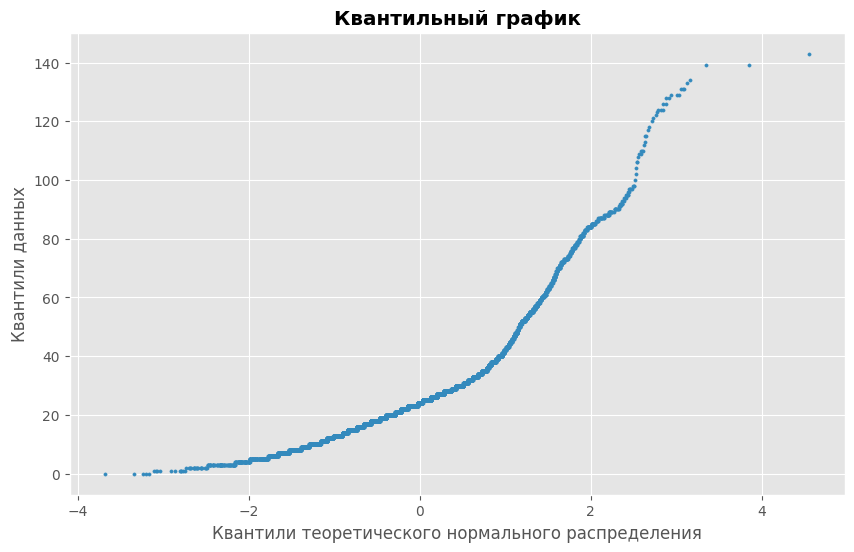

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

def qqplot(xs):
    '''Квантильный график (график квантиль-квантиль, Q-Q plot)'''
    d = {0: sorted(stats.norm.rvs(loc=0, scale=1, size=len(xs))),
         1: sorted(xs)}
    pd.DataFrame(d).plot.scatter(0, 1, s=5, grid=True)
    plt.xlabel('Квантили теоретического нормального распределения')
    plt.ylabel('Квантили данных')
    plt.title('Квантильный график', fontweight='semibold')

def AQI_v(df):
    '''Показать квантильные графики для честного и нечестного булочников'''
    qqplot(df['DAILY_AQI_VALUE'])
    plt.show()

# Вызов эксперимента для датафрейма df
AQI_v(df)

<ipython-input-19-eee322e50afe>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_column, shade=True)  # Построение функции плотности вероятности


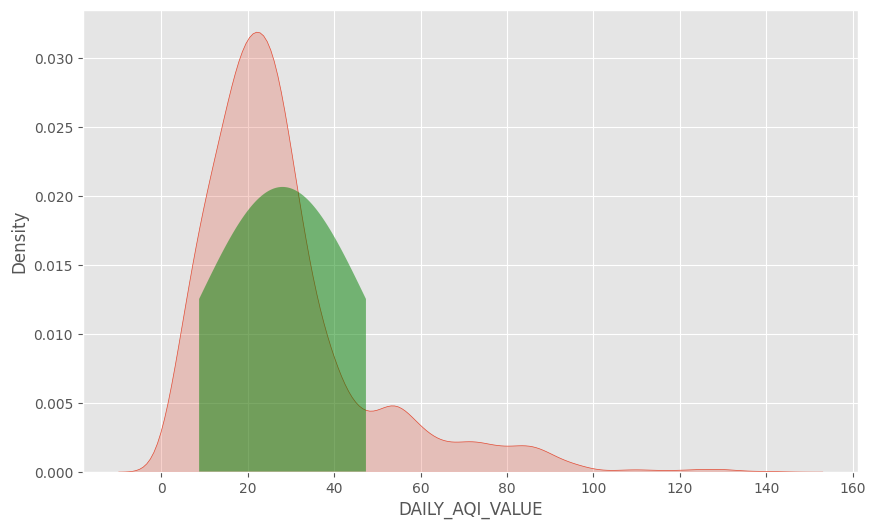

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

data_column = df['DAILY_AQI_VALUE']

mu = data_column.mean()  # Вычисление среднего значения
sigma = data_column.std()  # Вычисление стандартного отклонения

sns.kdeplot(data_column, shade=True)  # Построение функции плотности вероятности
x2 = np.arange(mu - sigma, mu + sigma, 0.001)
plt.fill_between(x2, y1=norm.pdf(x2, loc=mu, scale=sigma), facecolor='green', alpha=0.5)
plt.show()

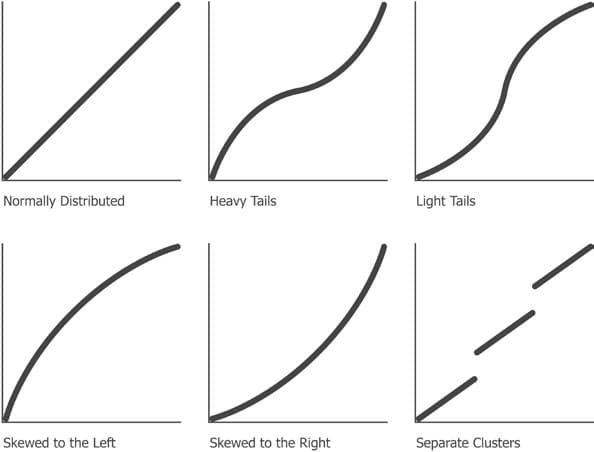

In [21]:
from PIL import Image

img = Image.open('/content/tail.jpeg')
display(img)

***После проверки данных на нормальность можем сделать вывод о том,что данные не имеют нормальное распределение и также смещены вправо***

# Задача 3.1.3. Визуализация данные

1. Данные содержат несколько записей о концентрации PM2,5 и AQI на одну и ту же дату, измеренных на разных объектах и с помощью разных датчиков (POCS). Постройте средние значения PM2,5 и AQI относительно даты на одном графике. Все, кто анализирует график, должен уметь определять: какова средняя концентрация PM 2,5 или значение AQI на конкретную дату.

2. Постройте график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015). Обратите внимание, что в этом случае среднее значение берется по POC. Резудбьтаты для обоих участков должны быть на одном рисунке.
*Подсказка*: использовать функцию `pandas groupby`.


# Подготовка данных к 1 заданию

In [20]:
import pandas as pd

In [21]:
# Ваш код
pm2_5_avg_group = df['Daily Mean PM2.5 Concentration'].groupby(df['Date']).mean()
pm2_5_avg_group

Date
2023-01-01     3.494444
2023-01-02     2.638889
2023-01-03     9.661111
2023-01-04     7.277778
2023-01-05     2.538889
                ...    
2023-12-27    15.311111
2023-12-28    22.400000
2023-12-29    24.122222
2023-12-30    25.472222
2023-12-31    26.683333
Name: Daily Mean PM2.5 Concentration, Length: 365, dtype: float64

In [22]:
df_pm2_5_avg = pd.DataFrame(pm2_5_avg_group)
df_pm2_5_avg

,Daily Mean PM2.5 Concentration
Date,
2023-01-01,3.494444
2023-01-02,2.638889
2023-01-03,9.661111
2023-01-04,7.277778
2023-01-05,2.538889
...,...
2023-12-27,15.311111
2023-12-28,22.400000
2023-12-29,24.122222


In [23]:
aqi_avg_group = df['DAILY_AQI_VALUE'].groupby(df['Date']).mean()
aqi_avg_group

Date
2023-01-01    14.611111
2023-01-02    11.000000
2023-01-03    40.111111
2023-01-04    30.277778
2023-01-05    10.555556
                ...    
2023-12-27    57.722222
2023-12-28    72.666667
2023-12-29    76.222222
2023-12-30    77.888889
2023-12-31    81.722222
Name: DAILY_AQI_VALUE, Length: 365, dtype: float64

In [24]:
df_aqi_avg = pd.DataFrame(aqi_avg_group)
df_aqi_avg


,DAILY_AQI_VALUE
Date,
2023-01-01,14.611111
2023-01-02,11.000000
2023-01-03,40.111111
2023-01-04,30.277778
2023-01-05,10.555556
...,...
2023-12-27,57.722222
2023-12-28,72.666667
2023-12-29,76.222222


##SQL

In [2]:
# подключаем SQLite
import sqlite3 as sl

In [3]:
# Устанавливаем соединение с базой данных
conn = sl.connect('thecode.db')

# Чтение данных из CSV файла
ad_viz = pd.read_csv('ad_viz_plotval_data.csv')

# Запись данных в базу данных SQLite
ad_viz.to_sql('ad_viz_plotval_data', conn, if_exists='replace', index=False)


6514

создание объекта курсора

In [4]:
cursor = conn.cursor()

### получение списка всех таблиц в бд

In [106]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [107]:
tables = cursor.fetchall()
for table in tables:
    print(table[0])

ad_viz_plotval_data


### ad_viz

In [92]:
ad_viz.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2023,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,01/02/2023,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,01/03/2023,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,01/04/2023,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,01/05/2023,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167


In [ ]:
ad_viz.info()

In [94]:
ad_viz['Date'] = pd.to_datetime(ad_viz['Date'])

In [96]:
#Эта функция принимает объект connection и SELECT-запрос, а возвращает выбранную запись.
# Источник: proglib "Как подружить Python и базы данных"
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

# изменение типа данных через sql (не помогло)

In [108]:
    # Выполняем запрос, чтобы получить тип данных столбца 'Date'
    cursor.execute("PRAGMA table_info(ad_viz_plotval_data)")
    columns_info = cursor.fetchall()

    # Находим информацию о типе данных столбца 'Date'
    for column in columns_info:
        if column[1] == 'Date':  # Проверяем имя столбца
            print(f"Тип данных для столбца 'Date' в таблице 'ad_viz_plotval_data': {column[2]}")



Тип данных для столбца 'Date' в таблице 'ad_viz_plotval_data': TEXT


In [112]:
try:
    cursor.execute("""
        CREATE TABLE ad_viz_plotval_data_new AS
        SELECT
            "Site ID",
            CAST("Date" AS DATE) AS "Date",
            "POC",
            "Daily Mean PM2.5 Concentration"
        FROM ad_viz_plotval_data
    """)
    conn.commit()

    print("Тип данных столбца 'Date' успешно изменен на DATE")

except sqlite3.Error as e:
    print("Ошибка при выполнении SQL запроса:", e)


Тип данных столбца 'Date' успешно изменен на DATE


In [113]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [114]:

tables = cursor.fetchall()
for table in tables:
    print(table[0])

ad_viz_plotval_data
ad_viz_plotval_data_new


# Данные содержат несколько записей о концентрации PM2,5 и AQI на одну и ту же дату, измеренных на разных объектах и с помощью разных датчиков (POCS). Постройте средние значения PM2,5 и AQI относительно даты на одном графике. Все, кто анализирует график, должен уметь определять: какова средняя концентрация PM 2,5 или значение AQI на конкретную дату.

In [97]:
group = """
select ad.date,
       avg(ad."Daily Mean PM2.5 Concentration") as avg_pm2_5,
       avg(ad.daily_aqi_value) as avg_aqi
from ad_viz_plotval_data as ad
group by 1
order by 1
"""

group_pm_aqi = execute_read_query(conn, group)

for pm_aqi in group_pm_aqi :
  print(pm_aqi)
# результат запроса загоняем в новый датафрейм
result_aa=pd.read_sql_query(group, conn)

('01/01/2023', 3.4944444444444445, 14.61111111111111)
('01/02/2023', 2.638888888888889, 11.0)
('01/03/2023', 9.66111111111111, 40.111111111111114)
('01/04/2023', 7.277777777777778, 30.27777777777778)
('01/05/2023', 2.5388888888888888, 10.555555555555555)
('01/06/2023', 4.894444444444445, 20.38888888888889)
('01/07/2023', 5.811111111111111, 24.27777777777778)
('01/08/2023', 2.2222222222222223, 9.222222222222221)
('01/09/2023', 2.15, 8.944444444444445)
('01/10/2023', 1.3555555555555556, 5.555555555555555)
('01/11/2023', 3.5444444444444447, 14.777777777777779)
('01/12/2023', 4.611111111111111, 19.27777777777778)
('01/13/2023', 8.755555555555556, 36.55555555555556)
('01/14/2023', 5.416666666666667, 22.61111111111111)
('01/15/2023', 2.333333333333333, 9.722222222222221)
('01/16/2023', 3.822222222222223, 16.11111111111111)
('01/17/2023', 5.638888888888889, 23.444444444444443)
('01/18/2023', 3.644444444444445, 15.333333333333334)
('01/19/2023', 6.177777777777779, 25.77777777777778)
('01/20/20

In [98]:
result_aa.head()

,Date,avg_pm2_5,avg_aqi
0,01/01/2023,3.494444,14.611111
1,01/02/2023,2.638889,11.000000
2,01/03/2023,9.661111,40.111111
3,01/04/2023,7.277778,30.277778
4,01/05/2023,2.538889,10.555556


In [115]:
result_aa['Date'] = pd.to_datetime(result_aa['Date'])

In [175]:
result_aa.isna().sum()

Date         0
avg_pm2_5    0
avg_aqi      0
dtype: int64

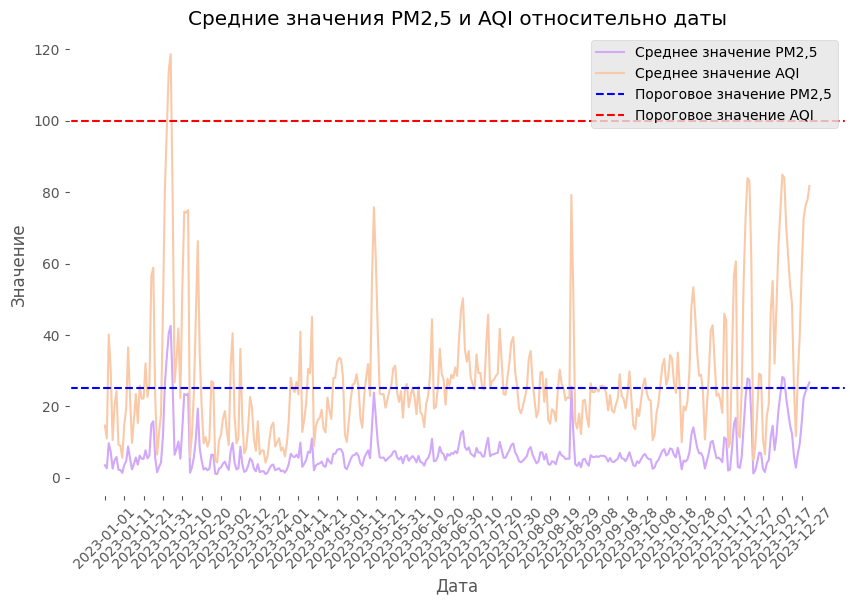

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('white')

ax.plot(result_aa['Date'], result_aa['avg_pm2_5'], label='Среднее значение PM2,5', color=(0.82, 0.66, 0.98))
ax.plot(result_aa['Date'], result_aa['avg_aqi'], label='Среднее значение AQI', color=(0.98, 0.79, 0.66))
ax.axhline(y=25, color='blue', linestyle='--', label='Пороговое значение PM2,5') # пороговое значение взято из интернета(значение после которого воздух считается грязным)
ax.axhline(y=100, color='red', linestyle='--', label='Пороговое значение AQI')
ax.set_xlabel('Дата')
ax.set_ylabel('Значение')
ax.set_title('Средние значения PM2,5 и AQI относительно даты')
ax.legend()
ax.grid(True)

# Добавление временной шкалы на ось x
ax.set_xticks(result_aa['Date'][::10])
ax.set_xticklabels(result_aa['Date'].dt.strftime('%Y-%m-%d')[::10], rotation=45)

plt.show()

# Постройте график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015). Обратите внимание, что в этом случае среднее значение берется по POC. Резудбьтаты для обоих участков должны быть на одном рисунке.

In [169]:
section = """
select
    ad."Site ID",
    ad.date,
    ad.poc,
    avg(ad."Daily Mean PM2.5 Concentration") as avg_pm2_5
    from ad_viz_plotval_data as ad
where ad."Site ID" = '490352005' or ad."Site ID" = '490353015'
group by 1, 2, 3
order by 1, 2, 3

"""

section_pm_aqi = execute_read_query(conn, section)

for pm_aqi in section_pm_aqi :
  print(pm_aqi)
# результат запроса загоняем в новый датафрейм
result_ab=pd.read_sql_query(section, conn)

(490352005, '01/01/2023', 1, 4.6)
(490352005, '01/01/2023', 4, 5.3)
(490352005, '01/02/2023', 1, 4.0)
(490352005, '01/02/2023', 4, 4.1)
(490352005, '01/03/2023', 1, 12.5)
(490352005, '01/03/2023', 4, 13.4)
(490352005, '01/04/2023', 1, 9.9)
(490352005, '01/04/2023', 4, 8.8)
(490352005, '01/05/2023', 1, 2.2)
(490352005, '01/05/2023', 4, 2.2)
(490352005, '01/06/2023', 1, 5.0)
(490352005, '01/06/2023', 4, 6.5)
(490352005, '01/07/2023', 1, 7.8)
(490352005, '01/07/2023', 4, 8.6)
(490352005, '01/08/2023', 1, 2.0)
(490352005, '01/08/2023', 4, 2.0)
(490352005, '01/09/2023', 1, 1.9)
(490352005, '01/09/2023', 4, 2.0)
(490352005, '01/10/2023', 1, 1.0)
(490352005, '01/10/2023', 4, 1.0)
(490352005, '01/11/2023', 1, 3.0)
(490352005, '01/11/2023', 4, 3.9)
(490352005, '01/12/2023', 1, 5.3)
(490352005, '01/12/2023', 4, 5.8)
(490352005, '01/13/2023', 1, 5.5)
(490352005, '01/13/2023', 4, 5.9)
(490352005, '01/14/2023', 1, 2.1)
(490352005, '01/14/2023', 4, 2.5)
(490352005, '01/15/2023', 1, 2.2)
(490352005, 

In [170]:
result_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Site ID    1443 non-null   int64  
 1   Date       1443 non-null   object 
 2   POC        1443 non-null   int64  
 3   avg_pm2_5  1443 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 45.2+ KB


In [171]:
result_ab.isna().sum()

Site ID      0
Date         0
POC          0
avg_pm2_5    0
dtype: int64

In [172]:
result_ab['Date'] = pd.to_datetime(result_aa['Date'])

In [173]:
result_ab.isna().sum()

Site ID         0
Date         1078
POC             0
avg_pm2_5       0
dtype: int64

In [174]:
result_ab.head(1000)

,Site ID,Date,POC,avg_pm2_5
0,490352005,2023-01-01,1,4.6
1,490352005,2023-01-02,4,5.3
2,490352005,2023-01-03,1,4.0
3,490352005,2023-01-04,4,4.1
4,490352005,2023-01-05,1,12.5
...,...,...,...,...
995,490353015,NaT,3,6.1
996,490353015,NaT,1,13.3
997,490353015,NaT,3,16.2
998,490353015,NaT,1,24.9


**второе задание оказалось проще сделать с помощью готового csv файла,который предварительно был создан в intelli j ,  так как на графике некорректно отображались данные с датой. Смена типа данных через pandas сделала для одного участках данные Nan, поэтому было принято решение загрузить готовые данные**


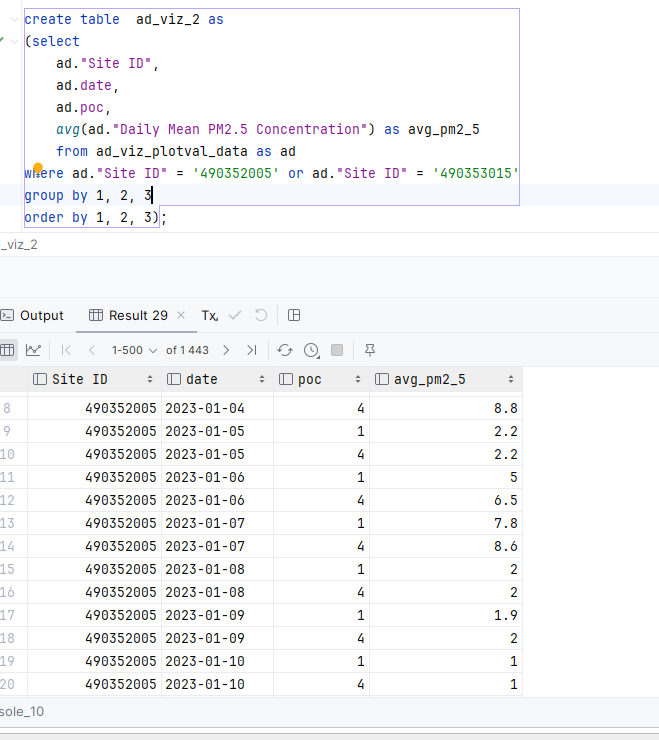

In [168]:
from PIL import Image

img = Image.open('/content/intelli.png')
display(img)

In [139]:
# Чтение данных из CSV-файла с помощью библиотеки pandas
result_ac = pd.read_csv("ad_viz_2.csv")
# Запись данных в новую таблицу в базе данных SQLite
result_ac.to_sql('ad_viz_2', conn, if_exists='replace', index=False)

1443

In [145]:
result_ac.head()

,Site ID,date,poc,avg_pm2_5
0,490352005,2023-01-01,1,4.6
1,490352005,2023-01-01,4,5.3
2,490352005,2023-01-02,1,4.0
3,490352005,2023-01-02,4,4.1
4,490352005,2023-01-03,1,12.5


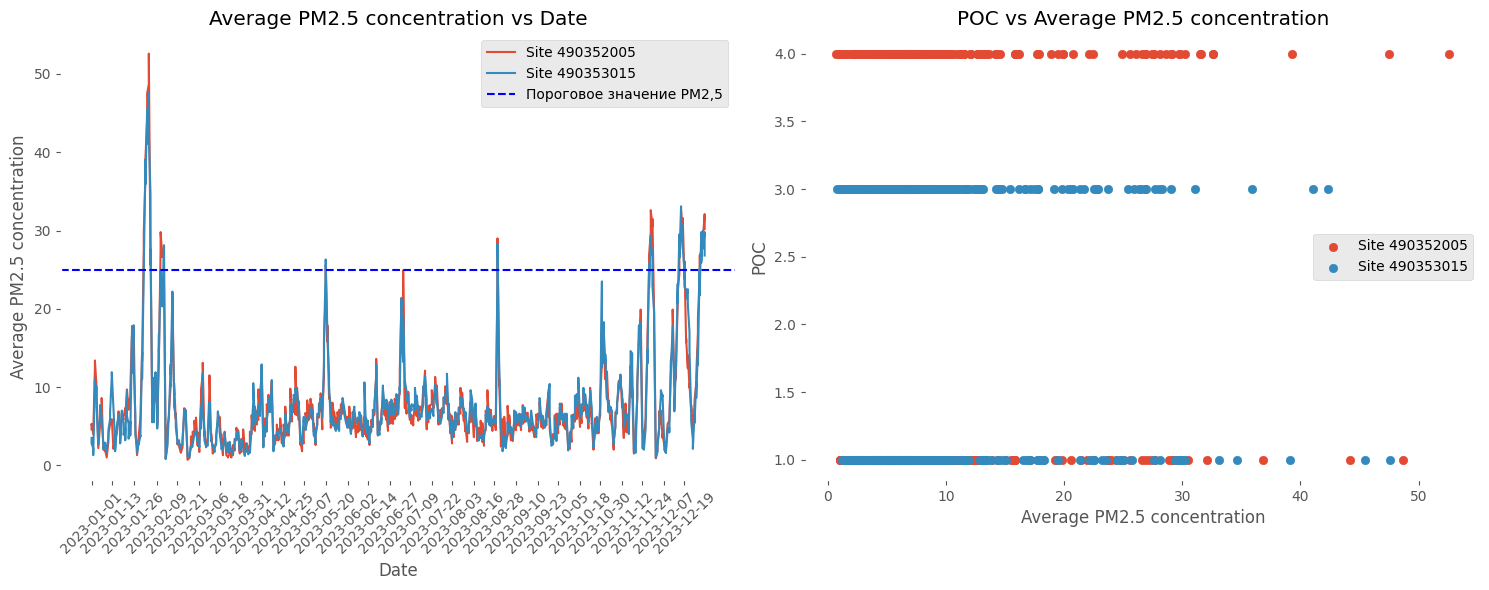

In [167]:
# Группировка данных по дате и расчет среднего значения PM 2.5 и POC
uchastok_005 = result_ac[result_ac['Site ID'] == 490352005]
uchastok_015 = result_ac[result_ac['Site ID'] == 490353015]

# Построение первого графика
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(uchastok_005['date'], uchastok_005['avg_pm2_5'], label='Site 490352005')
plt.plot(uchastok_015['date'], uchastok_015['avg_pm2_5'], label='Site 490353015')
plt.axhline(y=25, color='blue', linestyle='--', label='Пороговое значение PM2,5')
plt.xlabel('Date')
plt.ylabel('Average PM2.5 concentration')
plt.title('Average PM2.5 concentration vs Date')
plt.legend()
plt.grid(True)
# Добавление временной шкалы на ось x
plt.xticks(uchastok_005['date'][::25], rotation=45) #чтобы график был читаемым добавила только каждую 25 дату из данных
ax = plt.gca()
ax.patch.set_facecolor('white')


# Построение второго графика
plt.subplot(1, 2, 2)

plt.scatter(uchastok_005['avg_pm2_5'], uchastok_005['poc'], label='Site 490352005')
plt.scatter(uchastok_015['avg_pm2_5'], uchastok_015['poc'], label='Site 490353015')
plt.xlabel('Average PM2.5 concentration')
plt.ylabel('POC')
plt.title('POC vs Average PM2.5 concentration')
plt.legend()
plt.grid(True)

ax = plt.gca()
ax.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

**На первом графике видно,что загрязнение примерно одинаково на двух участках,в некоторых пиковых местах участок 490352005 (Copper View)  превышает участок 490353015(Utah Technical Center) на несколько значений**

**POC соотвествует конкретый монитор параметра на объекте,скорее всего цифрам 1-4 соотвествуют категориальные данные,которых у нас нет. Можем только предположить,что POC с индексом 1 соотвестует сразу двум участкам. Индекс 3 соотвествует участку 490353015, и индекс 4 участку 490352005**

# Задача 3.1.4. Постройте скользящее среднее

Постройте график с дневным значением AQI и скользящим средним для дневного значения AQI. Используйте дневное значение AQI, усредненное по сайтам и POC. Поэкспериментируйте с разными временными диапазонами, чтобы найти наиболее подходящее.

*Подсказка:* Используйте `rolling()`.

***Воспользуемся pandas для этого задания,чтобы использовать больше средств для решения задач***

In [48]:
result_ae = df[(df['Site ID'] == 490352005) | (df['Site ID'] == 490353015)][['Site ID', 'Date', 'POC', 'DAILY_AQI_VALUE']].copy()
result_ae.head()

,Site ID,Date,POC,DAILY_AQI_VALUE
0,490352005,2023-01-01,1,19
1,490352005,2023-01-02,1,17
2,490352005,2023-01-03,1,52
3,490352005,2023-01-04,1,41
4,490352005,2023-01-05,1,9


In [77]:
result_ae.shape

(1443, 5)

In [80]:
result_ae.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1443 entries, 0 to 4704
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Site ID           1443 non-null   int64         
 1   Date              1443 non-null   datetime64[ns]
 2   POC               1443 non-null   int64         
 3   DAILY_AQI_VALUE   1443 non-null   int64         
 4   7day_rolling_avg  1437 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 67.6 KB


In [75]:
result_af = result_ae.groupby(['Site ID', 'POC', 'Date'])['DAILY_AQI_VALUE'].mean()
result_af = result_af.reset_index()

In [76]:
result_af.head(10)

,Site ID,POC,Date,DAILY_AQI_VALUE
0,490352005,1,2023-01-01,19.0
1,490352005,1,2023-01-02,17.0
2,490352005,1,2023-01-03,52.0
3,490352005,1,2023-01-04,41.0
4,490352005,1,2023-01-05,9.0
5,490352005,1,2023-01-06,21.0
6,490352005,1,2023-01-07,33.0
7,490352005,1,2023-01-08,8.0
8,490352005,1,2023-01-09,8.0
9,490352005,1,2023-01-10,4.0


In [84]:
result_af[ '7day_rolling_avg' ] = result_af.DAILY_AQI_VALUE.rolling(7).mean()
result_af[ '28day_rolling_avg' ] = result_af.DAILY_AQI_VALUE.rolling(8).mean()
result_af.head(8)

,Site ID,POC,Date,DAILY_AQI_VALUE,7day_rolling_avg,28day_rolling_avg
0,490352005,1,2023-01-01,19.0,NaN,NaN
1,490352005,1,2023-01-02,17.0,NaN,NaN
2,490352005,1,2023-01-03,52.0,NaN,NaN
3,490352005,1,2023-01-04,41.0,NaN,NaN
4,490352005,1,2023-01-05,9.0,NaN,NaN
5,490352005,1,2023-01-06,21.0,NaN,NaN
6,490352005,1,2023-01-07,33.0,27.428571,NaN
7,490352005,1,2023-01-08,8.0,25.857143,25.0


In [82]:
# import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


источник https://www.geeksforgeeks.org/how-to-make-a-time-series-plot-with-rolling-average-in-python/

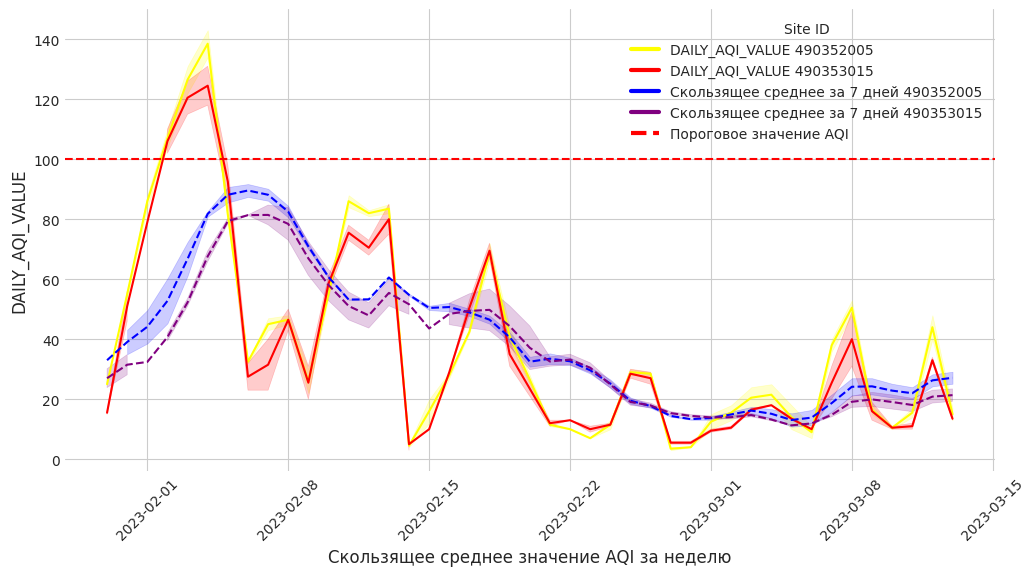

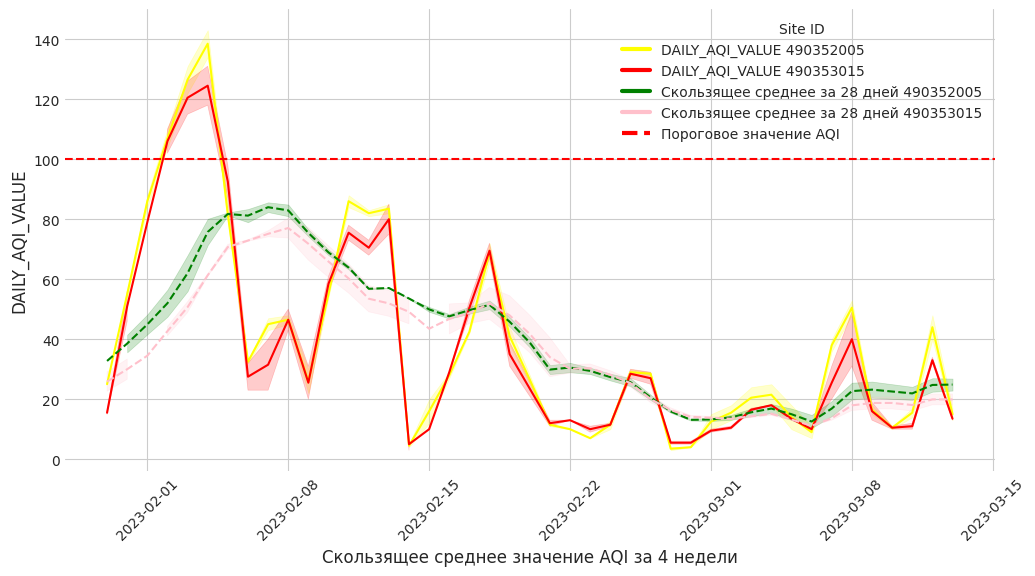

In [111]:
# Выбор периода от 2023-01-01 до 2023-03-01
start_date = '2023-01-30'
end_date = '2023-03-13'
result_af_period = result_af[(result_af['Date'] >= start_date) & (result_af['Date'] <= end_date)]
# Установка стиля
sns.set_style("whitegrid")
# Построение первого графика
plt.figure(figsize=(12, 6))
# График временного ряда DAILY_AQI_VALUE
sns.lineplot(x='Date', y='DAILY_AQI_VALUE', data=result_af_period, hue='Site ID', palette={490352005: 'yellow', 490353015: 'red'}, legend=False)
# График скользящего среднего за 7 дней с указанием цветов Site ID
sns.lineplot(x='Date', y='7day_rolling_avg', data=result_af_period, hue='Site ID', palette={490352005: 'blue', 490353015: 'purple'}, legend=False, linestyle='--')
plt.axhline(y=100, color='red', linestyle='--', label='Пороговое значение AQI')
plt.xticks(rotation=45)
plt.xlabel("Скользящее среднее значение AQI за неделю")
plt.legend(title='Site ID')
# Добавление легенды с конкретными цветами
legend_colors = {'DAILY_AQI_VALUE 490352005': 'yellow', 'DAILY_AQI_VALUE 490353015': 'red', 'Скользящее среднее за 7 дней 490352005': 'blue',
                 'Скользящее среднее за 7 дней 490353015': 'purple', 'Пороговое значение AQI': 'red'}
plt.legend(title='Site ID', labels=legend_colors.keys(), handles=[plt.Line2D([0], [0], color=legend_colors[label] if label != 'Пороговое значение AQI' else 'red', linewidth=3, linestyle='-' if label != 'Пороговое значение AQI' else '--') for label in legend_colors.keys()])

# Построение второго графика
plt.figure(figsize=(12, 6))
# График временного ряда DAILY_AQI_VALUE
sns.lineplot(x='Date', y='DAILY_AQI_VALUE', data=result_af_period, hue='Site ID', palette={490352005: 'yellow', 490353015: 'red'}, legend=False)
# График скользящего среднего за 4 недели с указанием цветов Site ID
sns.lineplot(x='Date', y='28day_rolling_avg', data=result_af_period, hue='Site ID', palette={490352005: 'green', 490353015: 'pink'}, legend=False, linestyle='--')
plt.axhline(y=100, color='red', linestyle='--', label='Пороговое значение AQI')
plt.xticks(rotation=45)
plt.xlabel("Скользящее среднее значение AQI за 4 недели")
plt.legend(title='Site ID')
# Добавление легенды с конкретными цветами
legend_colors = {'DAILY_AQI_VALUE 490352005': 'yellow', 'DAILY_AQI_VALUE 490353015': 'red', 'Скользящее среднее за 28 дней 490352005': 'green',
                 'Скользящее среднее за 28 дней 490353015': 'pink', 'Пороговое значение AQI': 'red'}
plt.legend(title='Site ID', labels=legend_colors.keys(), handles=[plt.Line2D([0], [0], color=legend_colors[label], linewidth=3, linestyle='-' if label != 'Пороговое значение AQI' else '--') for label in legend_colors.keys()])
plt.show()

***Попробуем изменить временной диапазон***

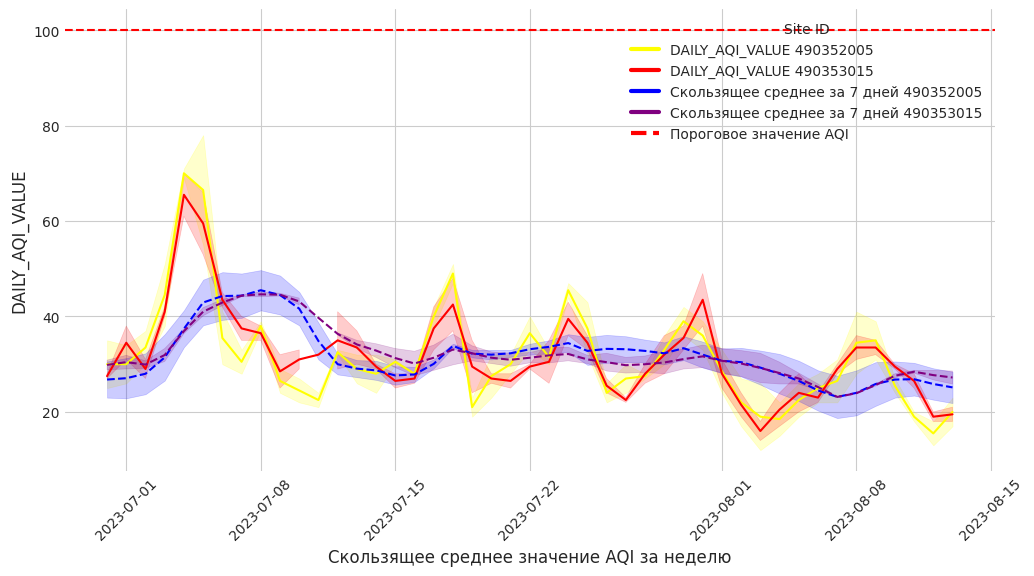

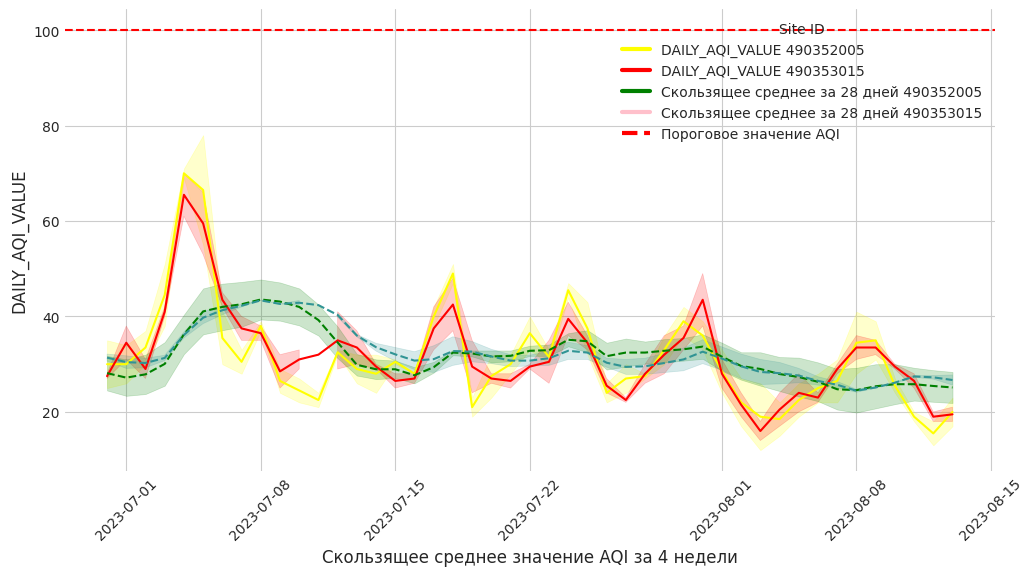

In [116]:
# Выбор периода от 2023-01-01 до 2023-03-01
start_date = '2023-06-30'
end_date = '2023-08-13'
result_af_period = result_af[(result_af['Date'] >= start_date) & (result_af['Date'] <= end_date)]
# Установка стиля
sns.set_style("whitegrid")
# Построение первого графика
plt.figure(figsize=(12, 6))
# График временного ряда DAILY_AQI_VALUE
sns.lineplot(x='Date', y='DAILY_AQI_VALUE', data=result_af_period, hue='Site ID', palette={490352005: 'yellow', 490353015: 'red'}, legend=False)
# График скользящего среднего за 7 дней с указанием цветов Site ID
sns.lineplot(x='Date', y='7day_rolling_avg', data=result_af_period, hue='Site ID', palette={490352005: 'blue', 490353015: 'purple'}, legend=False, linestyle='--')
plt.axhline(y=100, color='red', linestyle='--', label='Пороговое значение AQI')
plt.xticks(rotation=45)
plt.xlabel("Скользящее среднее значение AQI за неделю")
plt.legend(title='Site ID')
# Добавление легенды с конкретными цветами
legend_colors = {'DAILY_AQI_VALUE 490352005': 'yellow', 'DAILY_AQI_VALUE 490353015': 'red', 'Скользящее среднее за 7 дней 490352005': 'blue',
                 'Скользящее среднее за 7 дней 490353015': 'purple', 'Пороговое значение AQI': 'red'}
plt.legend(title='Site ID', labels=legend_colors.keys(), handles=[plt.Line2D([0], [0], color=legend_colors[label] if label != 'Пороговое значение AQI' else 'red', linewidth=3, linestyle='-' if label != 'Пороговое значение AQI' else '--') for label in legend_colors.keys()])

# Построение второго графика
plt.figure(figsize=(12, 6))
# График временного ряда DAILY_AQI_VALUE
sns.lineplot(x='Date', y='DAILY_AQI_VALUE', data=result_af_period, hue='Site ID', palette={490352005: 'yellow', 490353015: 'red'}, legend=False)
# График скользящего среднего за 4 недели с указанием цветов Site ID
sns.lineplot(x='Date', y='28day_rolling_avg', data=result_af_period, hue='Site ID', palette = {490352005: 'green', 490353015: (0.19, 0.58, 0.58)}, legend=False, linestyle='--')
plt.axhline(y=100, color='red', linestyle='--', label='Пороговое значение AQI')
plt.xticks(rotation=45)
plt.xlabel("Скользящее среднее значение AQI за 4 недели")
plt.legend(title='Site ID')
# Добавление легенды с конкретными цветами
legend_colors = {'DAILY_AQI_VALUE 490352005': 'yellow', 'DAILY_AQI_VALUE 490353015': 'red', 'Скользящее среднее за 28 дней 490352005': 'green',
                 'Скользящее среднее за 28 дней 490353015': 'pink', 'Пороговое значение AQI': 'red'}
plt.legend(title='Site ID', labels=legend_colors.keys(), handles=[plt.Line2D([0], [0], color=legend_colors[label], linewidth=3, linestyle='-' if label != 'Пороговое значение AQI' else '--') for label in legend_colors.keys()])
plt.show()

***Можем сделать вывод,что данные за июль и середину августа лучше,скользящее значение не доходит и 60 пунктов,в феврале и середине марта есть максимальные значение выходящие за порог,скользящее значение примерно выше лета на 20 пунктов. Зимой воздух грязнее,чем летом***

# Часть 3.2. A/B-тестирование

Сначала прочитайте статью WIRED об A/B-тестировании [здесь] (http://www.wired.com/2012/04/ff_abtesting/).

Предположим, ваша компания разрабатывает новый логотип. Художественный отдел разрабатывает два логотипа: ‘Logo A’ и ‘Logo B’, показанные ниже.
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)

Ваша задача — выяснить, какой логотип лучше.


Вы решаете провести следующий эксперимент. Вы используете рекламу Google, чтобы купить 6000 рекламных объявлений. В $N_A=3000$ объявлений (выбранных случайно) вы используете логотип А, а в остальных $N_B=3000$ объявлениях вы используете логотип Б. Затем вы видите, какой логотип привлекает больше кликов.

Оказывается, $n_A=800$ зрителей с логотипом A нажимают на рекламу, а $n_B=1000$ зрителей с логотипом B нажимают на рекламу. Очевидно, что логотип B показал лучшие результаты в этом тесте, но достаточно ли разница, чтобы сказать, что логотип B лучше? Или, возможно, ‘Logo B’ просто повезло в этом тесте?

Целью этого упражнения будет проведение двухпропорционального z-теста, чтобы определить, лучше ли ‘Logo B’. Шаги будут аналогичны шагам, использованным в эксперименте Солка с полиовакциной в 1954 году (1954 Salk polio-vaccine experiment).


### Задача 3.2.1. Сформулируйте нулевую гипотезу

Пусть $p_A = n_A/N_A$ — доля кликов по логотипу A, и аналогично $p_B$ — доля кликов по логотипу B. В терминах $p_A$ и $p_B$ четко сформулируйте нулевую и альтернативную гипотезы.

**Ваше решение:**

**H0 (Нулевая гипотеза): Logo B просто повезло в тесте, Logo A выглядит серьезнее
|H1 (Альтернативная гипотеза): Logo B лучше**

### Задача 2.2. Найдите двухпропорциональное z-значение

Предполагая нулевую гипотезу, мы знаем, что статистика, называемая *двухпропорциональным z-значением*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
приблизительно распределяется в соответствии со стандартным нормальным распределением. Здесь $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ и $\hat{q} = 1-\hat{p}$.


Найдите двухпропорциональное z-значение.

In [118]:
pip install statsmodels

In [119]:
import numpy as np
import statsmodels.api as sm

In [138]:
# Количество показов логотипа A и количество кликов на логотип A
n_A = 3000
click_A = 800

# Количество показов логотипа B и количество кликов на логотип B
n_B = 3000
click_B = 1000

In [139]:
dolya_a = click_A / n_A
dolya_b = click_B / n_B
print(f"Доля кликов по логотипу А: {dolya_a}")
print(f"Доля кликов по логотипу В: {dolya_b}")

Доля кликов по логотипу А: 0.26666666666666666
Доля кликов по логотипу В: 0.3333333333333333


In [140]:
#двухпропорциональное z-значение
z_score, p_value = sm.stats.proportions_ztest([click_A, click_B], [n_A, n_B], alternative='smaller')

if p_value < 0.05:
    print(f"Отвергаем нулевую гипотезу. Результат статистически значим. z-значение: {z_score}, p-значение: {p_value}")
else:
    print(f"Нет оснований отвергнуть нулевую гипотезу. Результат не является статистически значимым. z-значение: {z_score}, p-значение: {p_value}")

Отвергаем нулевую гипотезу. Результат статистически значим. z-значение: -5.6343616981901095, p-значение: 8.785395076012362e-09


### Задача 2.3. Завершите z-тест двух пропорций

Найдите значение $p$ для проверки гипотезы. Сначала, используя обычную функцию `cdf`, а затем проверьте свой ответ, запустив z-тест двух пропорций в Python с помощью  `proportions_ztest`.

In [130]:
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest

In [144]:
# Разница между долями кликов
p_diff = dolya_b - dolya_a
# Вычисляем стандартное отклонение для разности долей
std_error = np.sqrt(dolya_a * (1 - dolya_a) / n_A + dolya_b * (1 - dolya_b) / n_B)
# Находим значение z-score
z_score = p_diff / std_error
# Находим значение p с использованием функции cdf
p_znach = stats.norm.cdf(z_score)
print(f"Значение p, найденное с использованием функции cdf: {p_znach}")

Значение p, найденное с использованием функции cdf: 0.9999999919461322


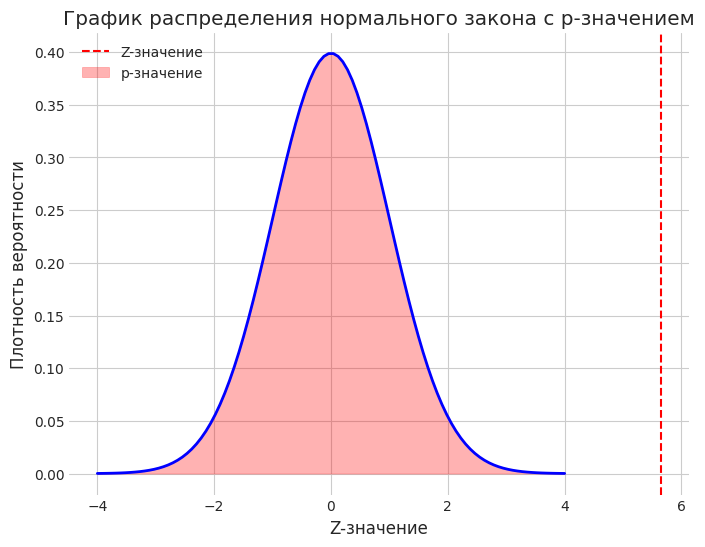

In [147]:
# Построение графика
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.axvline(x=z_score, color='r', linestyle='--', label='Z-значение')
plt.fill_between(x[x <= z_score], stats.norm.pdf(x[x <= z_score]), color='red', alpha=0.3, label='p-значение')
plt.xlabel('Z-значение')
plt.ylabel('Плотность вероятности')
plt.title('График распределения нормального закона с p-значением')
plt.legend()
plt.show()

**Z-значение находится справа от нормального распределения, это означает, что значение Z превышает критическое значение Z для заданного уровня значимости (обычно 0.05). Это может указывать на то, что различие между пропорциями кликов для двух групп (логотипов A и B) статистически значимо.
Когда Z-значение находится справа от нормального распределения, это может означать, что вероятность ошибки первого рода (ошибки отклонения нулевой гипотезы, когда она на самом деле верна) очень низкая. Таким образом, отклонение нулевой гипотезы в пользу альтернативной гипотезы (например, различия между двумя группами) может быть обоснованным.**

Метод proportions_ztest из библиотеки statsmodels.stats.proportion позволяет проводить Z-тест пропорций для двух независимых групп. Этот метод позволяет определить статистическую значимость различий между долями (пропорциями) в двух независимых выборках

In [145]:
z_score_proportions, p_value_proportions = sm.stats.proportions_ztest([click_A, click_B], [n_A, n_B], alternative='smaller')

print(f"Значение p, найденное с использованием proportions_ztest: {p_value_proportions}")

Значение p, найденное с использованием proportions_ztest: 8.785395076012362e-09
